# Neural Net "from scratch" with 2 layers (1 hidden) and a multinomial classification output
# *Réseau de neurones à 2 couches avec classification mulitnomiale*
### sources : 
https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

http://kkms.org/index.php/kjm/article/view/1275/673

https://stats.stackexchange.com/questions/378274/how-to-construct-a-cross-entropy-loss-for-general-regression-targets

https://physique.cmaisonneuve.qc.ca/svezina/mat/note_mat/MAT_Chap%206.2.pdf

<img src="multiclass-img.png" alt="2 layer neural net image" width=500 height=375> </img>

## The equations are given by (in vectorial notation) :
$\Large
X = 
\begin{bmatrix}
x_1^{1} & x_1^{2} & ... & x_1^{m} \\
x_2^{1} & x_2^{2} & ... & x_2^{m}
\end{bmatrix}
$
&emsp;
$\Large X \in \mathbb{R}^{n^{[0]} \times m}$
&emsp;
$;$ &emsp; &emsp;
$\Large
y = 
\begin{bmatrix}
y_1^{1} & y_1^{2} & ... & y_1^{m} \\
y_2^{1} & y_2^{2} & ... & y_2^{m} \\
y_3^{1} & y_3^{2} & ... & y_3^{m}
\end{bmatrix}
$
&emsp;
$\Large y \in \mathbb{R}^{n^{[2]} \times m}$
<br></br>


## Z and W matrices for each layer
### *Les matrices Z et W pour chaque couche* :<br> </br>
### $ Z^{[1]} = W^{[1]}.X + b^{[1]} $ &ensp; $et$ &ensp;  $ Z^{[2]} = W^{[2]}.A^{[1]} + b^{[2]} $
### $ A^{[1]} = \dfrac{1}{1+e^{-Z^{[1]}}}$ &emsp; &ensp; sigmoïd function
### $ A^{[2]} = \dfrac{e^{z_i}}{\sum_{k=1}^{k} e^{z_k}} $ &emsp; &ensp; softmax function

## The **dimensions** for these matrices
### *Les **dimensions** de ces matrices :*

### $ Z^{[1]},A^{[1]} \in \mathbb{R}^{n^{[1]} \times m} $ &emsp; &ensp; $;$ &nbsp; $ Z^{[2]},A^{[2]} \in \mathbb{R}^{n^{[2]} \times m}$ &emsp; &emsp; &emsp; &emsp; &emsp; 


### $ b^{[1]} \in \mathbb{R}^{n^{[1]} \times 1} $ &emsp; &ensp; $;$ &nbsp; $ b^{[2]} \in \mathbb{R}^{n^{[2]} \times 1}$ &emsp; &emsp; &emsp; &emsp; &emsp; 
### $ W^{[1]} \in \mathbb{R}^{n^{[1]} \times n^{[0]}}$ &nbsp; $;$ &nbsp; $ W^{[2]} \in \mathbb{R}^{n^{[2]} \times n^{[1]}}$ &nbsp; 

## Cross-entropy Loss function to minimize
### *Fonction d'entropie croisée à minimiser :* 

&nbsp; &nbsp; &nbsp; $\Large L(y,\hat{y}) = - \sum_{i} y_i log(\hat{y_i}) $

$\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[2]}} = \frac{1}{m} dz_2 . A^{[1]^{T}} \\
        \\
        \frac{\partial L}{\partial b^{[2]}} = \frac{1}{m} \sum_{_{axe1}} dz_2
    \end{array}
\right.
$
&emsp; $\Large avec$ &ensp; $\Large dz_2 = (A^{[2]}-y) $

$\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} dz_1 . X^{T}
       \\
        \\
        \frac{\partial L}{\partial b^{[1]}} = \frac{1}{m} \sum_{_{axe1}} dz_1
    \end{array}
\right.
$
&emsp; $\Large avec$ &ensp; $\Large dz_1 = W^{[2]^{T}}.dz_2 \times A^{[1]}(1 - A^{[1]}) $

### To understand how softmax derivative is calculated : 
https://rinterested.github.io/statistics/softmax.html

<img src="softmax_img.png" alt="2 layer neural net image" width=700 height=375> </img>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


## Let's try with a simple random 3-blobs case 
### *Cas d'une classification de 3 nuages de points random* : 

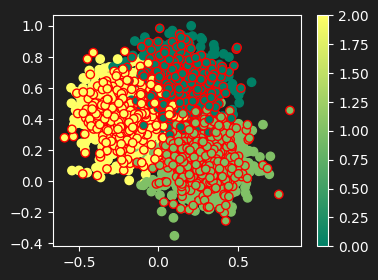

In [151]:
n_output_features = 3
X, y = make_blobs(n_samples=3000, n_features=2, centers=n_output_features, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalisation des données:
X_train_max = X_train.max()
X_train = X_train / X_train_max
X_test = X_test / X_train_max #ici on divise bien par la valeur max du train

X_train = X_train.T 
X_test = X_test.T 

# encodage des sorties (équivalent one hot encoder)
y_train_encoded = np.eye(n_output_features)[y_train].T
y_test_encoded = np.eye(n_output_features)[y_test].T


plt.figure(figsize=(4,3))
plt.scatter(X_train[0,:],X_train[1,:],c=y_train, cmap='summer')
plt.scatter(X_test[0,:],X_test[1,:],c=y_test, cmap='summer', edgecolors='red')
plt.colorbar()
plt.show()

## the y output array must be one-hot encoded so it takes the shape : &ensp; $ n^{[2]} \times m $
### Il faut encoder les sorties y pour que le vecteur aie la taille : &ensp; $ n^{[2]} \times m $


0 &rarr; $\large \begin{bmatrix}1\\0\\0\end{bmatrix}$ ;
1 &rarr; $\large \begin{bmatrix}0\\1\\0\end{bmatrix}$ et 
2 &rarr; $\large \begin{bmatrix}0\\0\\1\end{bmatrix}$


In [92]:
y_train[0:5]

array([0, 0, 2, 2, 0])

In [93]:
y_train_encoded[:,0:5]

array([[1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.]])

In [173]:
def initialisation(input_size, hidden_size, output_size):
    
    W1 = np.random.randn(hidden_size, input_size)
    b1 = np.random.randn(hidden_size, 1)
    W2 = np.random.randn(output_size, hidden_size)
    b2 = np.random.randn(output_size, 1)
    
    parametres = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    
    return parametres

In [174]:
parametres = initialisation(2,64,3)

In [175]:
for k, v in parametres.items():
    print(f"{k} shape : {v.shape}")

W1 shape : (64, 2)
W2 shape : (3, 64)
b1 shape : (64, 1)
b2 shape : (3, 1)


In [197]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def softmax(Z):
    Z_exp = np.exp(Z)
    Z_sum = np.sum(Z_exp, axis=0, keepdims=True)
    A = Z_exp/Z_sum
    return A

In [1]:
# we rename the "model" function to "forward propagation"
def forward_propagation(X, parametres):

    Z1 = parametres["W1"].dot(X) + parametres["b1"]
    A1 = sigmoid(Z1)
    Z2 = parametres["W2"].dot(A1) + parametres["b2"]
    A2 = softmax(Z2)
    
    activations = {
        "A1" : A1,
        "A2" : A2,
    }
    return activations

### **Loss function** : cross-entropy

$ \large L(y,\hat{y}) = - \sum_{i} y_i log(\hat{y_i}) $

In [152]:
def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred))

def loss_derivative(y_true, y_pred):
    return y_pred - y_true

In [101]:
f' X_train shape : {X_train.shape} ; y_train shape : {y_train.shape}'


' X_train shape : (2, 2100) ; y_train shape : (2100,)'

In [102]:
f' X_train shape : {X_train.shape} ; y_train_encoded shape : {y_train_encoded.shape}'

' X_train shape : (2, 2100) ; y_train_encoded shape : (3, 2100)'

### **Backward propagation** 

In [103]:
def back_propagation(X, y, activations, parametres):
    m = y.shape[1]
    
    dz2 = activations["A2"] - y #loss derivative
    dW2 = (1/m) * dz2.dot(activations["A1"].T) 
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = (parametres["W2"].T).dot(dz2) * activations["A1"]*(1-activations["A1"])
    dW1 = (1/m) * dz1.dot(X.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {
        "dW1" : dW1,
        "dW2" : dW2,
        "db1" : db1,
        "db2" : db2
    }
    
    return gradients

In [169]:
y_train_encoded.shape

(3, 2100)

### Gradient Descent : the Neural Net function

In [185]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train_encoded, X_test, y_test_encoded, n_layer1, learning_rate=0.1, n_epochs=100, plot_scores = False):
    
    n_layer0 = X_train.shape[0]
    n_layer2 = y_train_encoded.shape[0]
    
    parametres = initialisation(n_layer0, n_layer1, n_layer2)
    
    test_cost_hist = []
    train_cost_hist = []
    train_accuracy = []
    test_accuracy = []
    
    for i in tqdm(range(n_epochs)):
        
        activations = forward_propagation(X_train, parametres)
        
        #calcul des gradients:
        gradients = back_propagation(X_train, y_train_encoded, activations, parametres)
        
        #update des gradients:
        for p,g in zip(parametres.keys(), gradients.keys()):
            parametres[p] -= learning_rate * gradients[g]
        
        # Train
        A2_train = activations["A2"]
        train_output_pred = A2_train.argmax(axis=0) #renvoie un vecteur (1 x m)
        train_accuracy.append((train_output_pred == y_train_encoded.argmax(axis=0)).mean())
        train_cost = loss(y_train_encoded, A2_train)
        train_cost_hist.append(train_cost)
        
        # Test
        #y_pred = predict(X_test, parametres)
        A2_test = forward_propagation(X_test, parametres)["A2"]
        test_output_pred = A2_test.argmax(axis=0)
        test_accuracy.append((test_output_pred == y_test_encoded.argmax(axis=0)).mean())
        test_cost = loss(y_test_encoded, A2_test)
        test_cost_hist.append(test_cost)
    
    #stockage du coût et de l'accuracy, tous les 10 pas:
    
    scores = {
        "loss_train" : train_cost_hist,
        "loss_test" : test_cost_hist,
        "accuracy_train" : train_accuracy,
        "accuracy_test" : test_accuracy,
    }
            
    if plot_scores == True:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(range(len(train_cost_hist)),train_cost_hist, label="Train loss function")
        plt.plot(range(len(test_cost_hist)),test_cost_hist, label="Test loss function")
        plt.title("Loss function")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(range(len(train_accuracy)),train_accuracy, label="Train accuracy")
        plt.plot(range(len(test_accuracy)),test_accuracy, label="Test accuracy")
        plt.title("Accuracy")
        plt.legend()
        plt.show()
    
    return parametres, scores

100%|██████████| 2000/2000 [00:05<00:00, 349.62it/s]


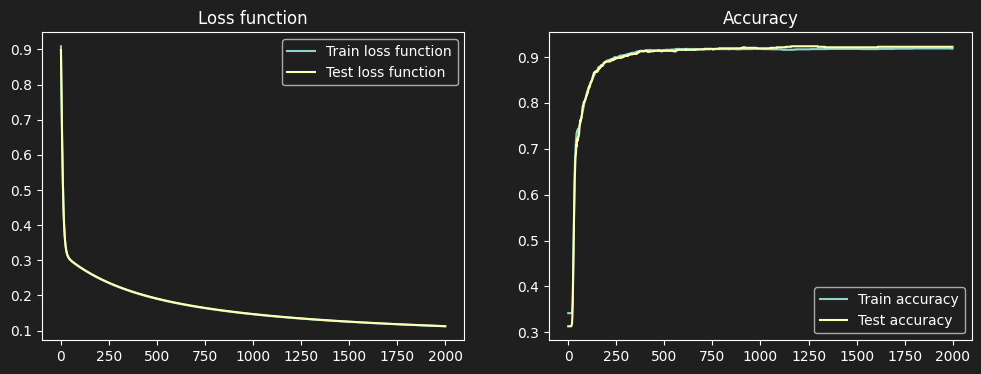

In [199]:
parametres_f, scores = neural_network(X_train, y_train_encoded, X_test, y_test_encoded, n_layer1 = 64,learning_rate=0.01,n_epochs=2000, plot_scores=True)

In [200]:
scores["accuracy_train"][-1]

0.9180952380952381

## Let's plot the decision border indirectly by using the neural net on a meshgrid of points. Predicted values for these meshgrid points are calculated with the neural network. We use 1 color per output value (3 colors in this case), this way we vizualise our model :

### *On plot la frontière de décision indirectement en utilisant le réseau de neurones sur un meshgrid de points pour prédire la valeur estimée de ces points, en utilisant 1 couleur par valeur de sortie prédite (y) on visualisera la forme du modèle*
source : https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron/71339#71339

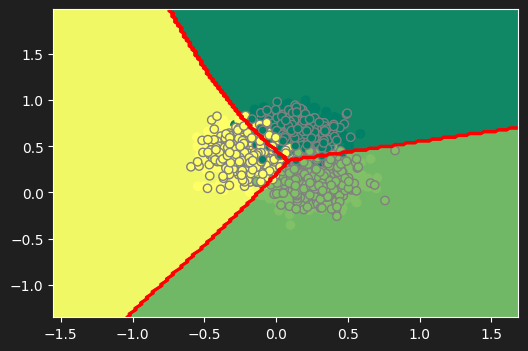

In [188]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
x2_min, x2_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
plt.figure(figsize=(6,4))

Z = forward_propagation(np.c_[xx1.ravel(), xx2.ravel()].T, parametres_f)["A2"]
# il faut réencoder Z pour passer de la taille (3 x 24024) à (1 x 24024) avec les valeurs de y
Z = Z.argmax(axis=0)

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap='summer')
plt.contour(xx1, xx2, Z, colors='red')
#ax.axis('off')
plt.scatter(X_train[0,:],X_train[1,:],c=y_train, cmap='summer')
plt.scatter(X_test[0,:],X_test[1,:],c=y_test, cmap='summer', edgecolors='gray')
plt.show()

In [190]:
param_dict = {}
scores_dict = {}
layers = [1,2,4,8,16,32]
for n in layers:
    param_dict[f"{n}_layers"], scores_dict[f"{n}_scores"] = neural_network(X_train, y_train_encoded, X_test, y_test_encoded, n,learning_rate=.01,n_epochs=1000)

100%|██████████| 1000/1000 [00:01<00:00, 633.57it/s]


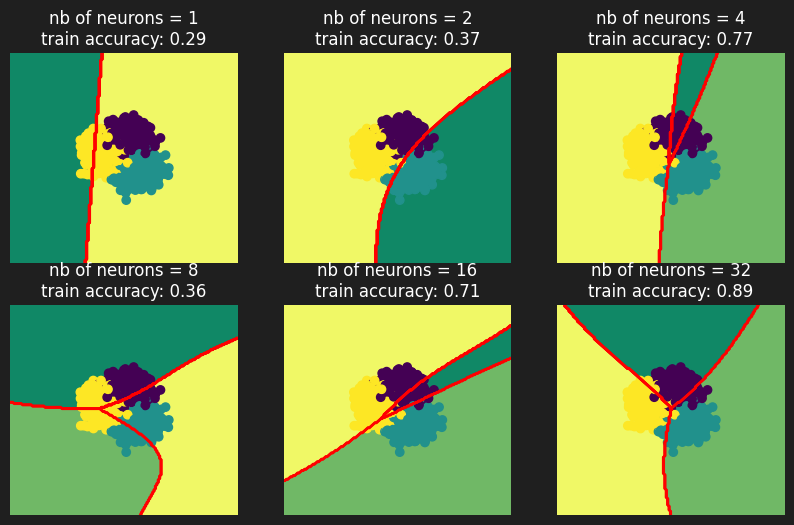

In [196]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
x2_min, x2_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig = plt.figure(figsize=(10,6))

for i,n in enumerate(layers):
    plt.subplot(2,3,i+1)
    Z = forward_propagation(np.c_[xx1.ravel(), xx2.ravel()].T, param_dict[f"{n}_layers"])["A2"]
    Z = Z.argmax(axis=0)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, cmap="summer")
    plt.contour(xx1, xx2, Z, colors='red')
    plt.axis('off')
    plt.scatter(X_train[0,:],X_train[1,:],c=y_train)
    final_accuracy_train = scores_dict[f'{n}_scores']['accuracy_train'][-1]
    plt.title(f"nb of neurons = {n}\ntrain accuracy: {final_accuracy_train:.2f}")

plt.show()

## Let's try with the MNIST digits example (10 outputs)
### *Application avec la bibliothèque MNIST de chiffres manuscrits [0,9]*

In [201]:
from sklearn.datasets import load_digits # for MNIST data
from sklearn.model_selection import train_test_split
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.max()

16.0

In [203]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max()
X_train_reshape = X_train_reshape.T

X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()
X_test_reshape = X_test_reshape.T

# Convert the target variable to one-hot encoding
y_train_encoded = np.eye(10)[y_train].T
y_test_encoded = np.eye(10)[y_test].T


In [205]:
y_train_encoded.shape

(10, 1203)

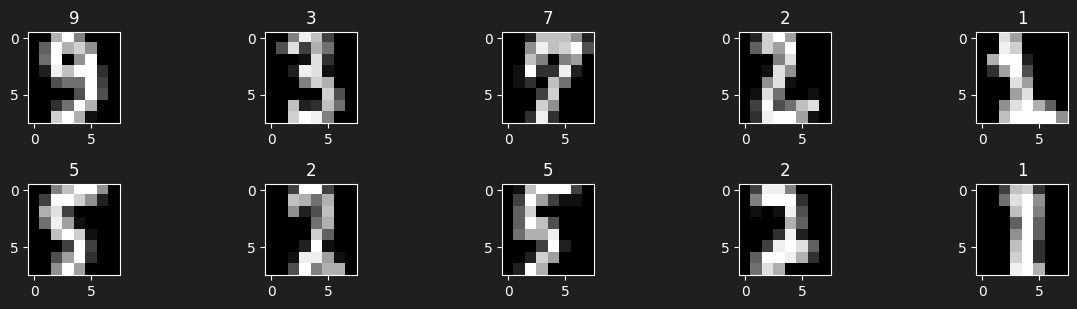

In [206]:
# visualization

X_train_viz = X_train.reshape(X_train.shape[0], 8, 8)
X_test_viz = X_test.reshape(X_test.shape[0], 8, 8)

plt.figure(figsize=(12,6))
for i in range(1,11):
    plt.subplot(4,5,i)
    #plt.imshow(X_train_viz[i], cmap='gray')
    plt.imshow(X_test_viz[i], cmap='gray')
    #plt.title(y_train.flatten()[i])
    plt.title(y_test.flatten()[i])
    plt.tight_layout()
plt.show()

100%|██████████| 1000/1000 [00:04<00:00, 228.21it/s]


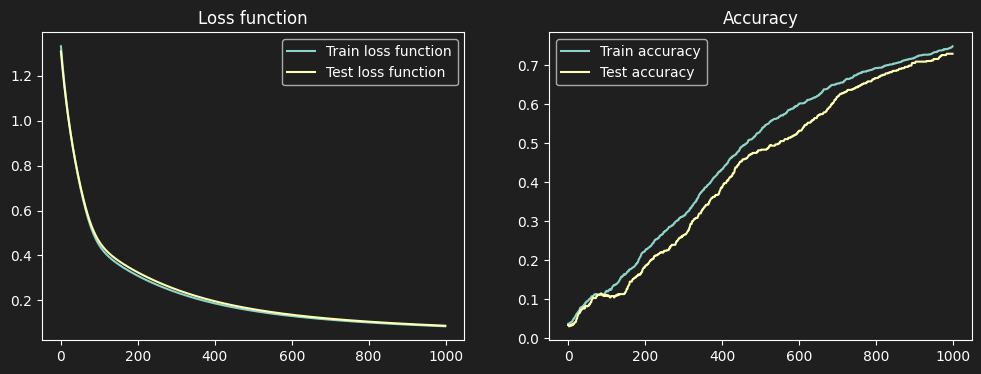

In [209]:
param_mnist, scores_mnist = neural_network(X_train_reshape, y_train_encoded, X_test_reshape, y_test_encoded, 128, learning_rate=.01,n_epochs=1000,plot_scores=True)

In [210]:
scores_mnist["accuracy_train"][-1]

0.7481296758104738